# Práctico 3: Problemas de satisfacción de restricciones (CSPs)

Para este práctico vamos a utilizar el módulo <code>python-constraint</code>, que contiene clases y métodos para definir y resolver CSPs. Para instalarlo es necesario escribir en la terminal:

<code>python -m pip install python-constraint</code>

Veamos algunos ejemplos de cómo usar el módulo. 

Lo primero que hacemos es importar el módulo con el alias csp:

In [ ]:
import constraint as csp

Ahora veamos cómo definir el **Problema de Coloreo de Australia**.

<div>
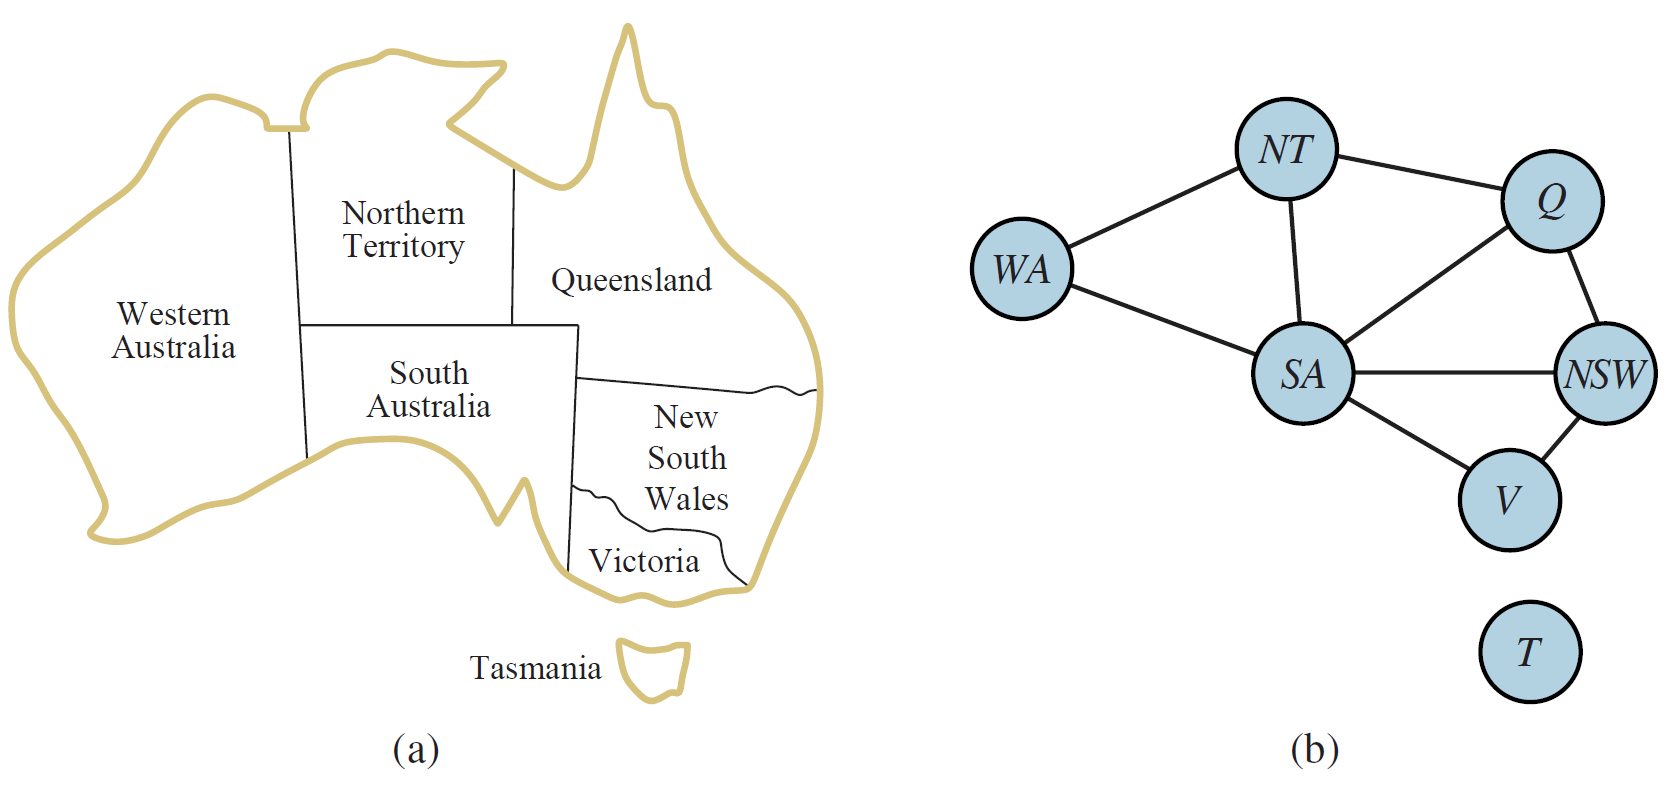
</div>

El primer paso es crear un objeto de la clase <code>Problem</code> llamando a su constructor:

In [ ]:
coloreo = csp.Problem()

A continuación, vamos a definir las variables y sus dominios.

En este caso, cada variables es una <code>str</code> con las iniciales de la región que representa y su dominio es una lista de <code>str</code> con los colores rojo, azul y verde:

In [ ]:
variables = ["WA", "NT", "Q", "NSW", "V", "SA", "T"]
dominio = ["rojo", "azul", "verde"]

El nombre de las variables también podría ser un número:

In [ ]:
variables2 = [1,2,3,4,5,6,7]

Para agregar las variables al problema, llamamos el método <code>addVariable(v,d)</code> de la clase <code>Problem</code>, donde <code>v</code> es el nombre de la variable y <code>d</code> es la lista de valores de su dominio:

In [ ]:
for v in variables:
    coloreo.addVariable(v, dominio)

Para agregar las restricciones, será de utilidad tener la lista de aristas del grafo de restricciones:

In [ ]:
aristas = [("WA","NT"), ("WA","SA"),
           ("NT","Q"), ("NT","SA"),
           ("Q","NSW"), ("Q","SA"),
           ("NSW","V"), ("NSW","SA"),
           ("V","SA")]

Para agregar las restricciones al problema, llamamos el método <code>addConstraint(c,vars)</code> de la clase <code>Problem</code>, donde <code>c</code> es un objeto de la clase <code>Constraint</code> y <code>vars</code> es una lista o tupla de variables involucradas en la restricción.

De la clase <code>Constraint</code> heredan varias clases de restricciones, por ejemplo la clase <code>AllDifferentConstraint</code> representa una restricción donde todas las variables deben ser distintas. 
Para consturir una restricción que diga que dos variables son distintas, simplemente llamamos al constructor <code>AllDifferentConstraint()</code>:

In [ ]:
for a in aristas:
    coloreo.addConstraint(csp.AllDifferentConstraint(), a)

Notar que si a <code>addConstraint(c)</code> no le pasamos como argumento a la lista de variables involucradas, entonces por default asumirá que todas las variables del problema estan involucradas en esa restricción.

Ya definido el CSP, lo tenemos que resolver. 

Para esto, primero construimos un objeto de la clase <code>Solver</code> mediante los constructores <code>BacktrackingSolver()</code> o <code>MinConflictsSolver()</code>, dependiendo si queremos resolver el CSP con una búsqueda hacia atrás o con una búsqueda local de mínimos-conflictos.

In [ ]:
solver = csp.BacktrackingSolver()

Por último, seteamos el solver en el problema mediante el método <code>setSolver(solver)</code> de la clase <code>Problem</code> y obtenemos la solución llamando al método <code>getSolution()</code> de la clase <code>Problem</code>.

In [ ]:
coloreo.setSolver(solver)
coloreo.getSolution()

También podemos pedir todas las soluciones mediante el método <code>getSolutions()</code> de la clase <code>Problem</code>:

In [ ]:
coloreo.getSolutions()

En resumen, el código completo es el siguiente.

In [ ]:
import constraint as csp

coloreo = csp.Problem()

variables = ["WA", "NT", "Q", "NSW", "V", "SA", "T"]
dominio = ["rojo", "azul", "verde"]
aristas = [("WA","NT"), ("WA","SA"),
           ("NT","Q"), ("NT","SA"),
           ("Q","NSW"), ("Q","SA"),
           ("NSW","V"), ("NSW","SA"),
           ("V","SA")]

for v in variables:
    coloreo.addVariable(v, dominio)

for a in aristas:
    coloreo.addConstraint(csp.AllDifferentConstraint(), a)

solver = csp.BacktrackingSolver()

coloreo.setSolver(solver)
coloreo.getSolution()

Pasemos a un ejemplo diferente. Considerar el problema de **scheduling** visto en clase.

Una parte del proceso de ensamblaje de un auto requiere de la siguiente secuencia de tareas:
* Instalar tren delantero y trasero (duración: 10 minutos por tren).
* Colocar ruedas (duración: 1 minuto por rueda).
* Ajustar las tuercas de cada rueda (duración: 2 minutos por rueda).
* Colocar la taza de cada rueda (duración: 1 minuto por rueda).
* Inspeccionar el ensamblaje final (duración: 3 minutos).

El objetivo es programar la hora de inicio de cada tarea, respetando el orden de las mismas, en un tiempo límite de 30 minutos.

Comenzamos nuevamente llamando al constructor de la clase <code>Problem</code>:

In [ ]:
scheduling = csp.Problem()

Definimos las variables y los dominios. Para facilitar la escritura de las restricciones, vamos a clasificar las variables según si corresponden a los trenes, las ruedas, las tuercas, las tazas o la inspección.

In [ ]:
trenes = ["TREN-D", "TREN-T"]
ruedas = ["RUEDA-DI","RUEDA-DD","RUEDA-TI","RUEDA-TD"]
tuercas = ["TUERCA-DI","TUERCA-DD","TUERCA-TI","TUERCA-TD"]
tazas = ["TAZA-DI","TAZA-DD","TAZA-TI","TAZA-TD"]
inspec = "INSPEC"
variables = trenes + ruedas + tuercas + tazas + [inspec]
dominio = range(0,31)

Agregamos las variables al problema:

In [ ]:
for v in variables:
    scheduling.addVariable(v, dominio)

Las restricciones de precedencia son un poco más difíciles de escribir, porque el módulo no las provee de forma directa. Sin embargo, la clase <code>FunctionConstraint</code> que hereda de la clase <code>Constraint</code> nos permite construir restricciones a partir de funciones definidas por el usuario.

Por ejemplo, para construir la restricción $$<(\text{TREN-D}, \text{RUEDA-DI}), \text{TREN-D} + 10 \leq \text{RUEDA-DI}>$$ primero definimos la función:

In [ ]:
def restrPrec1(x,y):
    return x + 10 <= y

y luego llamamos al constructor:

In [ ]:
csp.FunctionConstraint(restrPrec1,[trenes[0],ruedas[0]])

Para hacer las cosas más ágiles podemos recurrir a *funciones anónimas*. Python permite definir funciones en una sola línea sin necesidad de tener que darles un nombre. Por ejemplo:

In [ ]:
lambda x,y: x + 10 <= y

Y por supuesto, también las podemos aplicar:

In [ ]:
(lambda x,y: x + 10 <= y)(2,3)

A través de las funciones anónimas, podemos escribir la restricción de precedencia de forma más ágil:

In [ ]:
csp.FunctionConstraint(lambda x,y: x + 10 <= y,[trenes[0],ruedas[0]])

Entonces, vamos a agregar al problema las restricciones de precedencia que representan que los trenes se deben ensamblar antes que las ruedas y que el ensamblaje de cada tren toma 10 minutos:

In [ ]:
for i in range(2):
    for j in range(i * 2, i * 2 + 2):
        scheduling.addConstraint(csp.FunctionConstraint(lambda x, y: x + 10 <= y), [trenes[i], ruedas[j]])

# sin usar bucles, tendriamos que hacer:
# scheduling.addConstraint(csp.FunctionConstraint(lambda x, y: x + 10 <= y), [trenes[0], ruedas[0]])
# scheduling.addConstraint(csp.FunctionConstraint(lambda x, y: x + 10 <= y), [trenes[0], ruedas[1]])
# scheduling.addConstraint(csp.FunctionConstraint(lambda x, y: x + 10 <= y), [trenes[1], ruedas[2]])
# scheduling.addConstraint(csp.FunctionConstraint(lambda x, y: x + 10 <= y), [trenes[1], ruedas[3]])

Ahora, agregamos las restricciones de precedencia entre las ruedas y las tuercas:

In [ ]:
for i in range(4):
    scheduling.addConstraint(csp.FunctionConstraint(lambda x, y: x + 1 <= y), [ruedas[i], tuercas[i]])

Luego, las restricciones de precedencia entre las tuercas y las tazas:

In [ ]:
for i in range(4):
    scheduling.addConstraint(csp.FunctionConstraint(lambda x, y: x + 2 <= y), [tuercas[i], tazas[i]])

Ahora, las restricciones de precedencia para la inspección:

In [ ]:
for v in tazas:
    scheduling.addConstraint(csp.FunctionConstraint(lambda x, y: x + 1 <= y), [v, inspec])

Finalmente, agregamos la restricción que indica que la inspección debe finalizar en el tiempo límite:

In [ ]:
scheduling.addConstraint(csp.FunctionConstraint(lambda x: x <= 27), [inspec])

Por último, agregamos la restricción disyuntiva que impide que los trenes delantero y trasero se coloquen al mismo tiempo: 

In [ ]:
scheduling.addConstraint(csp.FunctionConstraint(lambda x, y: (x + 10 <= y) or (y + 10 <= x)), 
                         [trenes[0], trenes[1]])

Lo único que nos queda es utilizar el solver para encontrar una solución:

In [ ]:
solver = csp.BacktrackingSolver()
scheduling.setSolver(solver)
scheduling.getSolution()

En resumen, se tiene el siguiente código:

In [ ]:
import constraint as csp

scheduling = csp.Problem()

trenes = ["TREN-D", "TREN-T"]
ruedas = ["RUEDA-DI","RUEDA-DD","RUEDA-TI","RUEDA-TD"]
tuercas = ["TUERCA-DI","TUERCA-DD","TUERCA-TI","TUERCA-TD"]
tazas = ["TAZA-DI","TAZA-DD","TAZA-TI","TAZA-TD"]
inspec = "INSPEC"
variables = trenes + ruedas + tuercas + tazas + [inspec]
dominio = range(0,31)

for v in variables:
    scheduling.addVariable(v, dominio)

for i in range(2):
    for j in range(i * 2, i * 2 + 2):
        scheduling.addConstraint(csp.FunctionConstraint(lambda x, y: x + 10 <= y), [trenes[i], ruedas[j]])

for i in range(4):
    scheduling.addConstraint(csp.FunctionConstraint(lambda x, y: x + 1 <= y), [ruedas[i], tuercas[i]])

for i in range(4):
    scheduling.addConstraint(csp.FunctionConstraint(lambda x, y: x + 2 <= y), [tuercas[i], tazas[i]])

for v in tazas:
    scheduling.addConstraint(csp.FunctionConstraint(lambda x, y: x + 1 <= y), [v, inspec])

scheduling.addConstraint(csp.FunctionConstraint(lambda x: x <= 27), [inspec])

scheduling.addConstraint(csp.FunctionConstraint(lambda x, y: (x + 10 <= y) or (y + 10 <= x)), 
                         [trenes[0], trenes[1]])

solver = csp.BacktrackingSolver()
scheduling.setSolver(solver)
scheduling.getSolution()

Con esta pequeña introducción, ya pueden resolverse los ejercicios que se proponen a continuación. 

Para más información sobre el módulo *python-constraint* se puede ver la [descripción](https://pypi.org/project/python-constraint/) y su [documentación](http://labix.org/doc/constraint/).

## $n$-Reinas

El objetivo de este problema es ubicar $n$ reinas sobre un tablero de ajedrez de dimensión $n \times n$, de modo que ningún par de reinas se esté atacando:

<br />
<div>
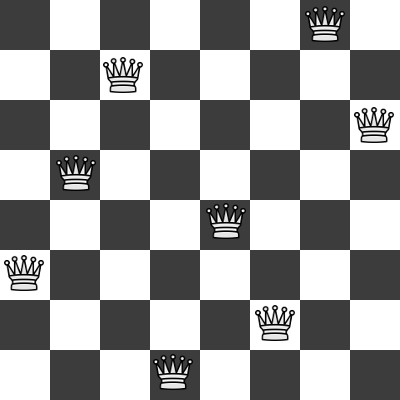
</div>

##### Ejercicio 1.1

Escribir en papel este problema como un CSP. 

**Ayuda 1.** Usar una variable $F_i$, para cada $i \in \{1,\ldots,8\}$, que representa la fila donde se encuentra la reina de la columna $i$.

**Ayuda 2.** Las restricciones que impiden que dos reinas estén en una misma diagonal se pueden describir como:
$$<(F_i,F_j),\ \text{abs}(F_i-F_j) \neq j-i> ~~~~~ \forall 1 \leq i < j \leq n. $$

##### Ejercicio 1.2

Definir una función <code>n_queens(n)</code> que construya el CSP de las $n$-Reinas usando <code>python-constraint</code>.

**Ayuda.** Las restricciones $$<(F_i,F_j),\ \text{abs}(F_i-F_j) \neq j-i> ~~~~~ \forall 1 \leq i < j \leq n $$ presentan un desafío adicional porque para calcular $j-i$ es necesario acceder a las variables locales del bucle. Para esto, vamos a aumentar la función anónima con 2 argumentos, cuyos valores serán por defecto los valores de las variables locales del bucle:

In [ ]:
def n_queens(n):
    reinas = csp.Problem()
    variables = range(1, n+1)
    # ... Completar ...
    for i in range(n-1):
        for j in range(i+1,n):
            reinas.addConstraint(csp.FunctionConstraint(lambda x, y, w=i, z=j: abs(x-y) != z-w), 
                                 [variables[i], variables[j]])
    return reinas

# Testear si la definición de la función es correcta
reinas = n_queens(8) 
solver = csp.BacktrackingSolver()
reinas.setSolver(solver)
reinas.getSolution()

##### Ejercicio 1.3

Encontrar todas las soluciones para el problema de las 8-reinas usando búsqueda hacia atrás. Mida el tiempo consumido por la búsqueda.

In [ ]:
import time

start = time.time()
# Completar
# ...
end = time.time()
print("Tiempo total: ", end-start)

¿Qué sucede con el tiempo al aumentar el número de reinas?

##### Ejercicio 1.4

Repita el ejercicio anterior, esta vez encontrando una única solución. ¿Qué sucede con el tiempo al aumentar el número de reinas? ¿Por qué cree que sucede esto?

## Ejercicio 2. Sudoku

El objetivo es completar los espacios en blanco de la grilla con números del 1 al 9, respetando las siguientes restricciones:
* No se pueden repetir números en cada fila.
* No se pueden repetir números en cada columna.
* No se pueden repetir números en cada caja (grilla 3x3 delimitada por las líneas en trazo grueso).

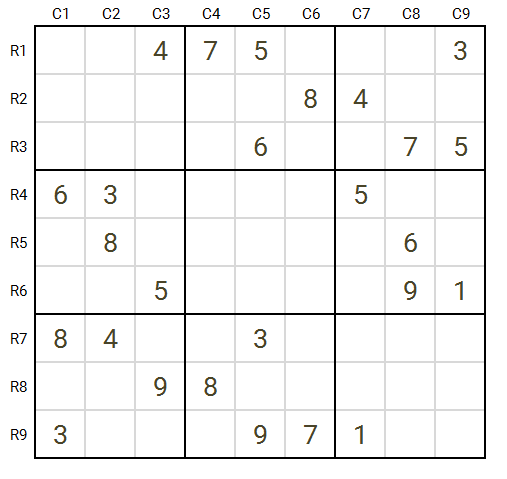

##### Ejercicio 2.1

Escribir en papel este problema como un CSP.

##### Ejercicio 2.2

Escribir un programa que resuelva este Sudoku usando <code>python-constraint</code>.

**Ayuda.** Si el nombre de las variables son números de dos dígitos, donde la decena indica el número de fila y la unidad el número de columna, entonces los dominios de las variables ya fijadas están dadas por el siguiente diccionario:

In [ ]:
variables_fijadas = {13:4, 14:7, 15:5, 19:3,
                     26:8, 27:4,
                     35:6, 38:7, 39:5,
                     41:6, 42:3, 47:5,
                     52:8, 58:6,
                     63:5, 68:9, 69:1,
                     71:8, 72:4, 75:3,
                     83:9, 84:8,
                     91:3, 95:9, 96:7, 97:1}

sudoku = csp.Problem()
# Completar
# ...

## Ejercicio 3. Criptoaritmo

En este acertijo, cada letra se corresponde con un dígito distinto (de 0 a 9) y el objetivo es encontrar valores que verifiquen la siguiente suma:

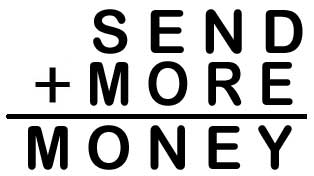

**Nota.** No se permiten *leading zeros*, es decir, que los números tengan ceros a la izquierda del último dígito positivo. Por ejemplo, el número "007" tiene dos leading zeros.


##### Ejercicio 3.1

Escribir en papel este problema como un CSP.

##### Ejercicio 3.2

Escribir un programa que resuelva este criptoaritmo usando <code>python-constraint</code>.